In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed

# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/latest-covid19-india-statewise-data/Latest Covid-19 India Status.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
main_df = pd.read_csv("/kaggle/input/latest-covid19-india-statewise-data/Latest Covid-19 India Status.csv")
df = main_df.copy()
df

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,7584,8,7447,129,0.11,98.19,1.70
1,Andhra Pradesh,2030849,14652,2002187,14010,0.72,98.59,0.69
2,Arunachal Pradesh,53807,533,53004,270,0.99,98.51,0.50
3,Assam,595669,5615,584296,5758,0.94,98.09,0.97
4,Bihar,725833,77,716098,9658,0.01,98.66,1.33
5,Chandigarh,65160,32,64311,817,0.05,98.70,1.25
6,Chhattisgarh,1004902,376,990968,13558,0.04,98.61,1.35
7,Dadra and Nagar Haveli and Daman and Diu,10670,5,10661,4,0.05,99.92,0.04
8,Delhi,1438250,377,1412790,25083,0.03,98.23,1.74
9,Goa,174891,702,170972,3217,0.40,97.76,1.84


In [4]:
# Shape of the dataset
df.shape

(36, 8)

In [5]:
# Getting list of all columns present in the dataframe
df.columns

Index(['State/UTs', 'Total Cases', 'Active', 'Discharged', 'Deaths',
       'Active Ratio (%)', 'Discharge Ratio (%)', 'Death Ratio (%)'],
      dtype='object')

In [6]:
# Checking for the duplicated value

df.duplicated().sum()

0

In [7]:
# Replacing long name by short name

df = df.replace('Dadra and Nagar Haveli and Daman and Diu', 'Daman and Diu')
df.head(8)

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,7584,8,7447,129,0.11,98.19,1.70
1,Andhra Pradesh,2030849,14652,2002187,14010,0.72,98.59,0.69
2,Arunachal Pradesh,53807,533,53004,270,0.99,98.51,0.50
3,Assam,595669,5615,584296,5758,0.94,98.09,0.97
4,Bihar,725833,77,716098,9658,0.01,98.66,1.33
5,Chandigarh,65160,32,64311,817,0.05,98.70,1.25
6,Chhattisgarh,1004902,376,990968,13558,0.04,98.61,1.35
7,Daman and Diu,10670,5,10661,4,0.05,99.92,0.04


In [8]:
# Information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State/UTs            36 non-null     object 
 1   Total Cases          36 non-null     int64  
 2   Active               36 non-null     int64  
 3   Discharged           36 non-null     int64  
 4   Deaths               36 non-null     int64  
 5   Active Ratio (%)     36 non-null     float64
 6   Discharge Ratio (%)  36 non-null     float64
 7   Death Ratio (%)      36 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 2.4+ KB


In [9]:
# Statistical measurement of the dataset

df.describe()

,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
count,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000
mean,9.247105e+05,10061.305556,9.023378e+05,12311.472222,1.175000,97.558611,1.266667
std,1.363114e+06,35512.447915,1.319414e+06,23708.098573,3.103863,2.983397,0.566321
min,7.584000e+03,5.000000,7.447000e+03,4.000000,0.010000,81.330000,0.040000
25%,7.699000e+04,153.500000,7.243350e+04,814.000000,0.050000,97.722500,0.955000
50%,4.718740e+05,556.500000,4.635625e+05,5445.500000,0.460000,98.280000,1.300000
75%,1.007885e+06,5343.500000,9.939285e+05,13671.000000,0.797500,98.652500,1.585000
max,6.500617e+06,209335.000000,6.309021e+06,138169.000000,18.340000,99.920000,2.740000


In [10]:
# Checking for any missing value

df.isnull().sum()

State/UTs              0
Total Cases            0
Active                 0
Discharged             0
Deaths                 0
Active Ratio (%)       0
Discharge Ratio (%)    0
Death Ratio (%)        0
dtype: int64

<AxesSubplot:>

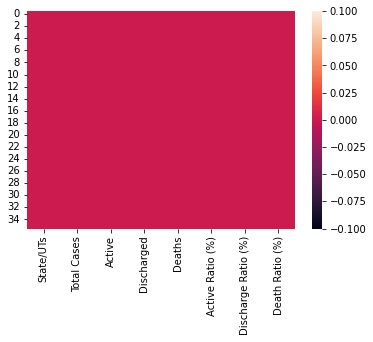

In [11]:
# Visualization for missing value

sns.heatmap(df.isnull())

In [12]:
# Checking correlations within variables

df.corr()

,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
Total Cases,1.000000,0.639275,0.999875,0.892632,-0.019477,0.005099,0.082269
Active,0.639275,1.000000,0.627818,0.318091,0.239952,-0.212727,-0.191431
Discharged,0.999875,0.627818,1.000000,0.895666,-0.025199,0.010547,0.084912
Deaths,0.892632,0.318091,0.895666,1.000000,-0.076856,0.024859,0.291315
Active Ratio (%),-0.019477,0.239952,-0.025199,-0.076856,1.000000,-0.983362,-0.300365
Discharge Ratio (%),0.005099,-0.212727,0.010547,0.024859,-0.983362,1.000000,0.122105
Death Ratio (%),0.082269,-0.191431,0.084912,0.291315,-0.300365,0.122105,1.000000


<AxesSubplot:>

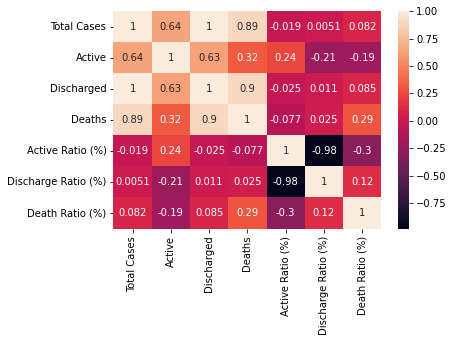

In [13]:
# Visualization of correlations within variables

sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='Total Cases', ylabel='State/UTs'>

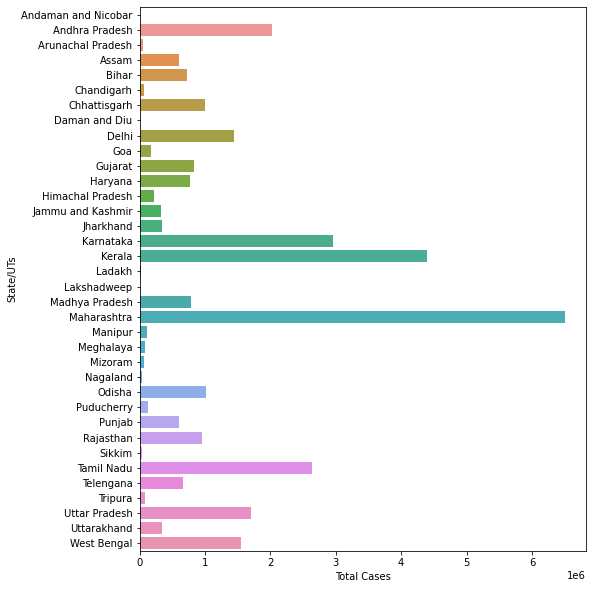

In [14]:
# Barplot using seaborn

plt.figure(figsize=(8, 10))
sns.barplot(data = df, y="State/UTs", x="Total Cases")

In [15]:
px.bar(df, x="State/UTs", y="Total Cases", color="Death Ratio (%)", title="Total Cases as per each State : ")

In [16]:
px.scatter(df, x='Active Ratio (%)',y='Death Ratio (%)', color=df['State/UTs'])

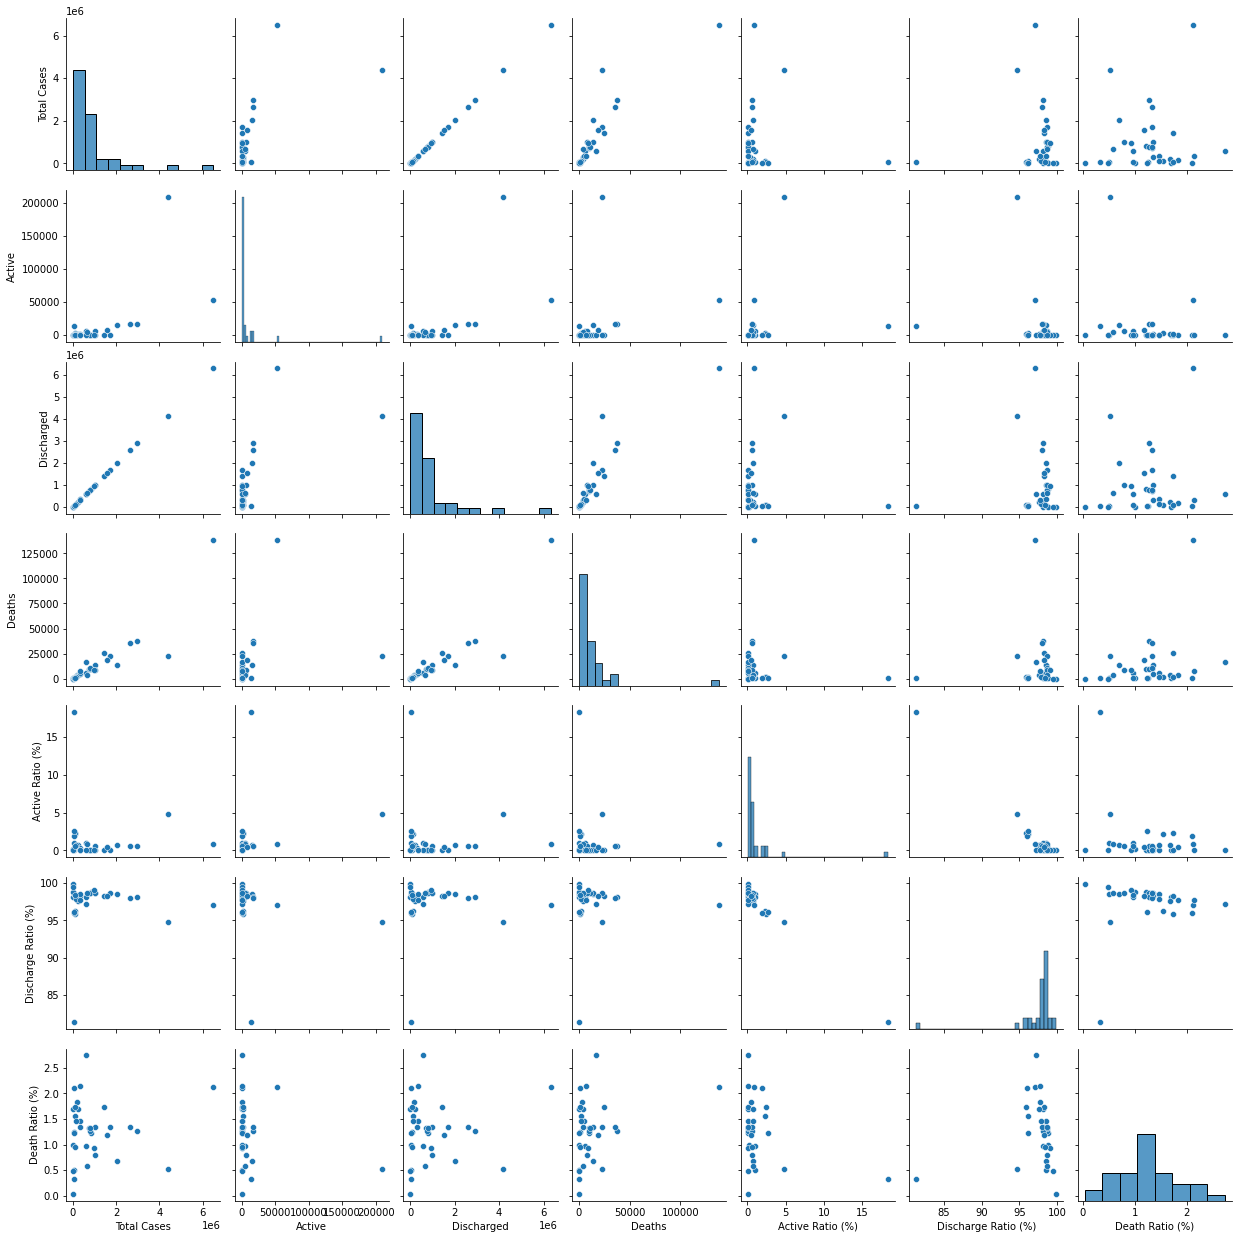

In [17]:
sns.pairplot(df)

In [18]:
px.density_heatmap(df, y="Total Cases", x="State/UTs", marginal_x="histogram", marginal_y="histogram")

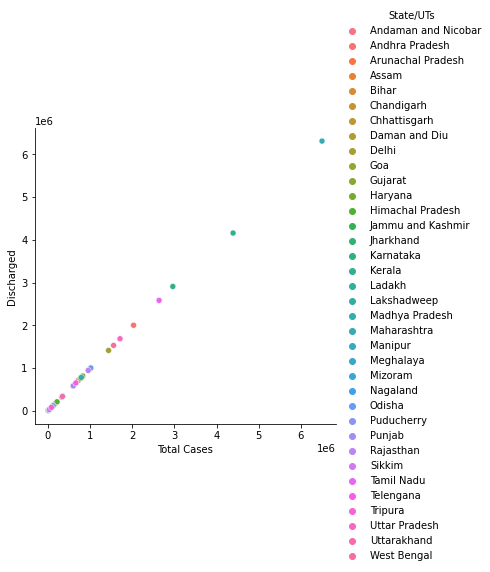

In [19]:
sns.relplot(x = 'Total Cases', y ='Discharged', hue = 'State/UTs', data = df)

In [20]:
fig = px.scatter_matrix(df, dimensions=["Total Cases", "Active", "Discharged", "Deaths"], color=df['State/UTs'])
fig.show()

In [21]:
px.scatter(df, x="Total Cases", y="Active",size="Active Ratio (%)", color="Active Ratio (%)",hover_name="State/UTs", log_x=True, size_max=60)

In [22]:
fig = px.scatter(df, x="Total Cases", y="Active", size="Deaths", color=df['State/UTs'], log_x=True, size_max=50)
fig.show()

In [23]:
fig = px.pie(df, values='Total Cases', names=df['State/UTs'], title='Covid cases (%) in all states of India')
fig.show()

In [24]:
df.nunique()

State/UTs              36
Total Cases            36
Active                 35
Discharged             36
Deaths                 36
Active Ratio (%)       27
Discharge Ratio (%)    33
Death Ratio (%)        32
dtype: int64

In [25]:
fig = px.pie(df, values='Discharge Ratio (%)', names=df['State/UTs'], title='Covid cases (%) in all states of India')
fig.show()

In [26]:
fig = px.pie(df, values='Death Ratio (%)', names=df['State/UTs'], title='Covid cases (%) in all states of India')
fig.show()

In [27]:
# State having highest number of covid cases in India.

highest_cases = df[df['Total Cases'] == max(df['Total Cases'])]
highest_cases

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
20,Maharashtra,6500617,53427,6309021,138169,0.82,97.05,2.13


In [28]:
# State having Lowest number of covid cases in India.

lowest_cases = df[df['Total Cases'] == min(df['Total Cases'])]
lowest_cases

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,7584,8,7447,129,0.11,98.19,1.7


In [29]:
# State having highest number of Active cases in India.

highest_active = df[df['Active'] == max(df['Active'])]
highest_active

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
16,Kerala,4390489,209335,4158504,22650,4.77,94.72,0.52


In [30]:
# State having Lowest number of Active cases in India.

lowest_active = df[df['Active'] == min(df['Active'])]
lowest_active

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
7,Daman and Diu,10670,5,10661,4,0.05,99.92,0.04
18,Lakshadweep,10353,5,10297,51,0.05,99.46,0.49


In [31]:
# State having highest number of death ratio in India.

highest_death_ratio = df[df['Death Ratio (%)'] == max(df['Death Ratio (%)'])]
highest_death_ratio

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
27,Punjab,601072,309,584306,16457,0.05,97.21,2.74


In [32]:
# State having lowest number of death ratio in India.

lowest_death_ratio = df[df['Death Ratio (%)'] == min(df['Death Ratio (%)'])]
lowest_death_ratio

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
7,Daman and Diu,10670,5,10661,4,0.05,99.92,0.04


In [33]:
# State having highest discharge ratio in India.

highest_discharge_ratio = df[df['Discharge Ratio (%)'] == max(df['Discharge Ratio (%)'])]
highest_discharge_ratio

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
7,Daman and Diu,10670,5,10661,4,0.05,99.92,0.04


In [34]:
# State having lowest discharge ratio in India.

lowest_discharge_ratio = df[df['Discharge Ratio (%)'] == min(df['Discharge Ratio (%)'])]
lowest_discharge_ratio

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
23,Mizoram,72883,13369,59273,241,18.34,81.33,0.33


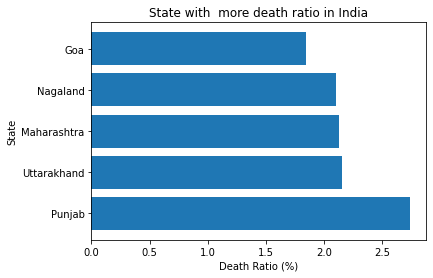

In [35]:
# Visualization of top 5 state having highest Death ratio in India.
df1 = df.sort_values(by='Death Ratio (%)', ascending=False).head()
states = df1['State/UTs']
ratio = df1['Death Ratio (%)']
plt.barh(states, ratio)
plt.xlabel('Death Ratio (%)')
plt.ylabel('State')
plt.title('State with  more death ratio in India')
plt.show()

In [36]:
# DataFrame of top 5 state having highest Death ratio in India.
df1

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
27,Punjab,601072,309,584306,16457,0.05,97.21,2.74
34,Uttarakhand,343242,293,335560,7389,0.09,97.76,2.15
20,Maharashtra,6500617,53427,6309021,138169,0.82,97.05,2.13
24,Nagaland,30657,580,29432,645,1.89,96.00,2.10
9,Goa,174891,702,170972,3217,0.40,97.76,1.84
